In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams

#reading file
pd.set_option('display.max_columns', 999)
movies = pd.read_csv("movies.csv", header=0)
movies = movies.replace({np.nan: None}) # replace NaN with None

print(movies.head())

ratings = pd.read_csv("ratings_small.csv", header=0)
print(ratings.head())

links = pd.read_csv("links.csv", header=0)
print(links.head())

#Total no. of movies
print(len(movies))

links.columns=["movieId","imdb_id","tmdbId"]
print(links.head())




      id                        title  \
0    862                    Toy Story   
1   8844                      Jumanji   
2  15602             Grumpier Old Men   
3  31357            Waiting to Exhale   
4  11862  Father of the Bride Part II   

                                             tagline  \
0                                               None   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                                         description  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                       genres  \
0   animation, comedy, family   
1  adventure,

In [2]:
#Demographic filtering recommender system
"""
Before getting started with this -

we need a metric to score or rate movie
Calculate the score for every movie
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,

v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as
"""

df2=movies[0:5000]
df2.head()


,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81,3.73554e+08,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.9469,7.7,5415,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,None,104,2.62797e+08,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.0155,6.9,2413,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101,0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,None,127,8.14522e+07,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.85949,6.1,34,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106,7.65789e+07,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.38752,5.7,173,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [3]:
C= df2['average_vote'].mean()
C

m= df2['num_votes'].quantile(0.9)
m

q_movies = df2.copy().loc[df2['num_votes'] >= m]
q_movies.shape

(500, 21)

In [4]:
def weighted_rating(x, m=m, C=C):
    v = x['num_votes']
    R = x['average_vote']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'num_votes', 'average_vote', 'score']].head(10)

,title,num_votes,average_vote,score
314,The Shawshank Redemption,8358,8.5,8.345057
841,The Godfather,6024,8.5,8.290189
2870,Fight Club,9678,8.3,8.176091
292,Pulp Fiction,8670,8.3,8.162569
351,Forrest Gump,8147,8.2,8.060828
522,Schindler's List,4436,8.3,8.046264
1175,The Empire Strikes Back,5998,8.2,8.015272
2231,Life Is Beautiful,3643,8.3,7.998472
1199,The Godfather: Part II,3418,8.3,7.981447
289,Leon: The Professional,4293,8.2,7.950467


Text(0.5, 1.0, 'Popular Movies')

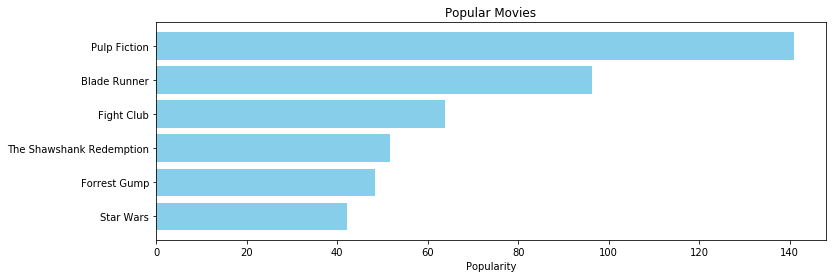

In [5]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [6]:
#Content based filtering

df2['description'].head(5)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['description'] = df2['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

C:\Users\sindh\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


(5000, 22178)

In [7]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]


In [8]:
get_recommendations('The Godfather')

1199     The Godfather: Part II
1934    The Godfather: Part III
4358                       Made
3318                 Soft Fruit
2918             American Movie
4826            The Beastmaster
4505            Family Business
4659                   3 Ninjas
1526         The Innocent Sleep
1697    The Replacement Killers
Name: title, dtype: object

In [11]:
#keyword based recommender

filledna=df2.fillna('')
filledna.head(2)

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,,104,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg


In [12]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))
    
features=['title','director','cast','genres','description']
filledna=filledna[features]

for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,genres,description
0,toystory,johnlasseter,"tomhanks,timallen,donrickles,jimvarney,wallace...","animation,comedy,family","ledbywoody,andy'stoyslivehappilyinhisroomuntil..."
1,jumanji,joejohnston,"robinwilliams,jonathanhyde,kirstendunst,bradle...","adventure,fantasy,family",whensiblingsjudyandpeterdiscoveranenchantedboa...


In [14]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['genres']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]


In [18]:
get_recommendations_new('Toy Story', cosine_sim2)

3024           Toy Story 2
3336     Creature Comforts
1131    The Wrong Trousers
2262          A Bug's Life
1201       A Grand Day Out
2473      Doug's 1st Movie
1792     Quest for Camelot
1738      Meet the Deedles
1450      Cats Don't Dance
734          A Close Shave
Name: title, dtype: object

In [23]:
# Install a conda package in the current Jupyter kernel
import sys
pip install scikit-surprise

SyntaxError: invalid syntax (<ipython-input-23-4cdd43dd8a29>, line 3)

In [24]:
#User rating based recommender

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [25]:
ratings.shape

(100004, 4)

In [27]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
#data.split(n_folds=5)

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.89957175, 0.89752295, 0.89206219, 0.89898122, 0.90036177]),
 'test_mae': array([0.69140204, 0.69245268, 0.68687646, 0.69292154, 0.69309066]),
 'fit_time': (4.905695915222168,
  4.723681449890137,
  4.916707992553711,
  4.821603775024414,
  4.784275054931641),
 'test_time': (0.1874220371246338,
  0.17599964141845703,
  0.11917328834533691,
  0.11103582382202148,
  0.12800097465515137)}

In [28]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [29]:
#Let us pick user with user Id 1 and check the ratings she/he has given.
ratings[ratings['userId'] == 1]

svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.8927232809963686, details={'was_impossible': False})

In [ ]:
#For movie with ID 302, we get an estimated prediction of 2.892. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

In [30]:
df2.to_csv(r'C:\Users\sindh\Downloads\Moviesdb\Movies_small.csv', index = False)